# MLP RNN 모델(다:1)
* DNN 모델을 RNN 모델로 변경할 때는 __input_shape__ 부분을 바구는 것이 가장 중요함 

## 1. 데이터

In [1]:
import numpy as np

In [2]:
dataset = np.array([1,2,3,4,5,6,7,8,9,10])

#### 데이터 자르기 함수 

In [3]:
def split_xy1(dataset, time_steps):
    x, y = list(), list()
    for i in range(len(dataset)):
        end_number = i + time_steps
        if end_number > len(dataset) -1:
           break
        tmp_x, tmp_y = dataset[i:end_number], dataset[end_number]
        x.append(tmp_x)
        y.append(tmp_y)
    return np.array(x), np.array(y)

In [4]:
x, y = split_xy1(dataset, 4)
print(x, "\n", y)
print(x.shape)
print(y.shape)

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]
 [6 7 8 9]] 
 [ 5  6  7  8  9 10]
(6, 4)
(6,)


* RNN에 맞는 입력 모양을 고려해야 함 --> 2차원에서 3차원으로 변경이 필요함!!
* 3차원 형태(사용하는 용어)
    - (samples, time_step, feature)
    - (행, 열, 특성)
    - (행, 열, 피쳐)
    - (행, 열, 몇개씩 자르는지)
    - (샘플수, 타임스탭, 피쳐) 
    - (전체데이터수, 컬럼, 특성)
    - (전체데이터수, 컬럼, 몇개씩자르는지)
* RNN은 3차원, input_shape=(?,?)는 2차원 
    - input_shape가 2차원인 이유는 __"행무시"__ 때문

In [5]:
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)

(6, 4, 1)


## 2. 모델 구성

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

* input_shape(4,1) : 4개의 컬럼을 1개씩 잘라서 쓰는 LSTM을 구성하겠다는 의미

In [7]:
model = Sequential()
model.add(LSTM(64, input_shape=(4, 1)))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


## 3. 훈련

In [8]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(x, y, epochs=1000, batch_size=1)

Train on 6 samples
Epoch 1/1000
6/6 [==============================] - 2s 366ms/sample - loss: 58.9271 - mse: 58.9271
Epoch 2/1000
6/6 [==============================] - 0s 2ms/sample - loss: 51.9212 - mse: 51.9212
Epoch 3/1000
6/6 [==============================] - 0s 3ms/sample - loss: 45.2667 - mse: 45.2667
Epoch 4/1000
6/6 [==============================] - 0s 3ms/sample - loss: 39.3783 - mse: 39.3783
Epoch 5/1000
6/6 [==============================] - 0s 2ms/sample - loss: 33.1242 - mse: 33.1242
Epoch 6/1000
6/6 [==============================] - 0s 3ms/sample - loss: 26.5611 - mse: 26.5611
Epoch 7/1000
6/6 [==============================] - 0s 3ms/sample - loss: 20.0628 - mse: 20.0628
Epoch 8/1000
6/6 [==============================] - 0s 3ms/sample - loss: 14.0235 - mse: 14.0235
Epoch 9/1000
6/6 [==============================] - 0s 3ms/sample - loss: 8.5725 - mse: 8.5725
Epoch 10/1000
6/6 [==============================] - 0s 3ms/sample - loss: 5.4361 - mse: 5.4361
Epoch 11/100

6/6 [==============================] - 0s 2ms/sample - loss: 0.1685 - mse: 0.1685
Epoch 87/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.1679 - mse: 0.1679
Epoch 88/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.1402 - mse: 0.1402
Epoch 89/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.1352 - mse: 0.1352
Epoch 90/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.1468 - mse: 0.1468
Epoch 91/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.1313 - mse: 0.1313
Epoch 92/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.1398 - mse: 0.1398
Epoch 93/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.1386 - mse: 0.1386
Epoch 94/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.1322 - mse: 0.1322
Epoch 95/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.1230 - mse: 0.1230
Epoch 96/1000
6/6 [==============================] - 0

6/6 [==============================] - 0s 2ms/sample - loss: 0.0376 - mse: 0.0376
Epoch 171/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0456 - mse: 0.0456
Epoch 172/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0425 - mse: 0.0425
Epoch 173/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0351 - mse: 0.0351
Epoch 174/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0406 - mse: 0.0406
Epoch 175/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0322 - mse: 0.0322
Epoch 176/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0322 - mse: 0.0322  
Epoch 177/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0384 - mse: 0.0384
Epoch 178/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0405 - mse: 0.0405
Epoch 179/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0327 - mse: 0.0327
Epoch 180/1000
6/6 [=======================

6/6 [==============================] - 0s 3ms/sample - loss: 0.0117 - mse: 0.0117
Epoch 255/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0078 - mse: 0.0078
Epoch 256/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0104 - mse: 0.0104
Epoch 257/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0019 - mse: 0.0019
Epoch 258/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0082 - mse: 0.0082
Epoch 259/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0050 - mse: 0.0050  
Epoch 260/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0064 - mse: 0.0064
Epoch 261/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0073 - mse: 0.0073
Epoch 262/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0135 - mse: 0.0135  
Epoch 263/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0042 - mse: 0.0042
Epoch 264/1000
6/6 [=====================

6/6 [==============================] - 0s 2ms/sample - loss: 0.0054 - mse: 0.0054
Epoch 336/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0020 - mse: 0.0020
Epoch 337/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0024 - mse: 0.0024
Epoch 338/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0016 - mse: 0.0016  
Epoch 339/1000
6/6 [==============================] - 0s 2ms/sample - loss: 3.5848e-04 - mse: 3.5848e-04
Epoch 340/1000
6/6 [==============================] - 0s 2ms/sample - loss: 7.0187e-04 - mse: 7.0187e-04
Epoch 341/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0013 - mse: 0.0013
Epoch 342/1000
6/6 [==============================] - 0s 2ms/sample - loss: 5.3324e-04 - mse: 5.3324e-04
Epoch 343/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0015 - mse: 0.0015  
Epoch 344/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0016 - mse: 0.0016
Epoch 345/1000
6/

6/6 [==============================] - 0s 3ms/sample - loss: 6.4919e-04 - mse: 6.4919e-04
Epoch 417/1000
6/6 [==============================] - 0s 3ms/sample - loss: 5.2539e-04 - mse: 5.2539e-04
Epoch 418/1000
6/6 [==============================] - 0s 3ms/sample - loss: 3.8037e-04 - mse: 3.8037e-04
Epoch 419/1000
6/6 [==============================] - 0s 3ms/sample - loss: 3.0883e-04 - mse: 3.0883e-04
Epoch 420/1000
6/6 [==============================] - 0s 3ms/sample - loss: 5.3666e-04 - mse: 5.3666e-04
Epoch 421/1000
6/6 [==============================] - 0s 3ms/sample - loss: 2.9782e-04 - mse: 2.9782e-04
Epoch 422/1000
6/6 [==============================] - 0s 2ms/sample - loss: 4.2680e-04 - mse: 4.2680e-04
Epoch 423/1000
6/6 [==============================] - 0s 3ms/sample - loss: 5.6192e-04 - mse: 5.6192e-04
Epoch 424/1000
6/6 [==============================] - 0s 2ms/sample - loss: 7.0623e-04 - mse: 7.0623e-04
Epoch 425/1000
6/6 [==============================] - 0s 3ms/sample - 

6/6 [==============================] - 0s 3ms/sample - loss: 0.0013 - mse: 0.0013
Epoch 498/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0029 - mse: 0.0029  
Epoch 499/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0016 - mse: 0.0016  
Epoch 500/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0027 - mse: 0.0027
Epoch 501/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0012 - mse: 0.0012
Epoch 502/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0034 - mse: 0.0034
Epoch 503/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0032 - mse: 0.0032  
Epoch 504/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0027 - mse: 0.0027
Epoch 505/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0020 - mse: 0.0020
Epoch 506/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0030 - mse: 0.0030
Epoch 507/1000
6/6 [===================

6/6 [==============================] - 0s 3ms/sample - loss: 0.0019 - mse: 0.0019
Epoch 578/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0021 - mse: 0.0021
Epoch 579/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0045 - mse: 0.0045
Epoch 580/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0040 - mse: 0.0040  
Epoch 581/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0038 - mse: 0.0038
Epoch 582/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0013 - mse: 0.0013
Epoch 583/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0013 - mse: 0.0013
Epoch 584/1000
6/6 [==============================] - 0s 2ms/sample - loss: 6.3400e-04 - mse: 6.3400e-04
Epoch 585/1000
6/6 [==============================] - 0s 2ms/sample - loss: 8.5420e-04 - mse: 8.5420e-04
Epoch 586/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0014 - mse: 0.0014  
Epoch 587/1000
6/6 [=====

Epoch 659/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0051 - mse: 0.0051
Epoch 660/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0082 - mse: 0.0082
Epoch 661/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0026 - mse: 0.0026
Epoch 662/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0021 - mse: 0.0021  
Epoch 663/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0092 - mse: 0.0092
Epoch 664/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0068 - mse: 0.0068
Epoch 665/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0031 - mse: 0.0031  
Epoch 666/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0075 - mse: 0.0075
Epoch 667/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0109 - mse: 0.0109
Epoch 668/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0025 - mse: 0.0025  
Epoch 669/1000
6/6 [====

6/6 [==============================] - 0s 2ms/sample - loss: 0.0073 - mse: 0.0073
Epoch 742/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0113 - mse: 0.0113
Epoch 743/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0158 - mse: 0.0158
Epoch 744/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0125 - mse: 0.0125
Epoch 745/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0058 - mse: 0.0058
Epoch 746/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0040 - mse: 0.0040
Epoch 747/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0026 - mse: 0.0026  
Epoch 748/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0027 - mse: 0.0027
Epoch 749/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0010 - mse: 0.0010
Epoch 750/1000
6/6 [==============================] - 0s 2ms/sample - loss: 3.0530e-04 - mse: 3.0530e-04
Epoch 751/1000
6/6 [===============

Epoch 823/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0063 - mse: 0.0063
Epoch 824/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0030 - mse: 0.0030  
Epoch 825/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0043 - mse: 0.0043
Epoch 826/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0016 - mse: 0.0016
Epoch 827/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0027 - mse: 0.0027
Epoch 828/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011
Epoch 829/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0016 - mse: 0.0016  
Epoch 830/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0016 - mse: 0.0016
Epoch 831/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0012 - mse: 0.0012  
Epoch 832/1000
6/6 [==============================] - 0s 3ms/sample - loss: 3.6881e-04 - mse: 3.6881e-04
Epoch 833/1000
6

6/6 [==============================] - 0s 2ms/sample - loss: 8.5957e-04 - mse: 8.5957e-04
Epoch 904/1000
6/6 [==============================] - 0s 3ms/sample - loss: 9.6453e-04 - mse: 9.6453e-04
Epoch 905/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0012 - mse: 0.0012
Epoch 906/1000
6/6 [==============================] - 0s 2ms/sample - loss: 6.0863e-04 - mse: 6.0863e-04
Epoch 907/1000
6/6 [==============================] - 0s 2ms/sample - loss: 6.3081e-04 - mse: 6.3081e-04
Epoch 908/1000
6/6 [==============================] - 0s 2ms/sample - loss: 2.8101e-04 - mse: 2.8101e-04
Epoch 909/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0011 - mse: 0.0011  
Epoch 910/1000
6/6 [==============================] - 0s 2ms/sample - loss: 3.3162e-04 - mse: 3.3162e-04
Epoch 911/1000
6/6 [==============================] - 0s 3ms/sample - loss: 3.8543e-04 - mse: 3.8543e-04
Epoch 912/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0012 -

6/6 [==============================] - 0s 2ms/sample - loss: 0.0021 - mse: 0.0021
Epoch 985/1000
6/6 [==============================] - 0s 2ms/sample - loss: 0.0028 - mse: 0.0028
Epoch 986/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0037 - mse: 0.0037  
Epoch 987/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0024 - mse: 0.0024
Epoch 988/1000
6/6 [==============================] - 0s 3ms/sample - loss: 5.2734e-04 - mse: 5.2734e-04
Epoch 989/1000
6/6 [==============================] - 0s 3ms/sample - loss: 7.3298e-04 - mse: 7.3298e-04
Epoch 990/1000
6/6 [==============================] - 0s 2ms/sample - loss: 2.9412e-04 - mse: 2.9412e-04
Epoch 991/1000
6/6 [==============================] - 0s 2ms/sample - loss: 3.4535e-04 - mse: 3.4535e-04
Epoch 992/1000
6/6 [==============================] - 0s 3ms/sample - loss: 0.0015 - mse: 0.0015
Epoch 993/1000
6/6 [==============================] - 0s 2ms/sample - loss: 6.4464e-04 - mse: 6.4464e-04
Epo

## 4. 학습과정확인

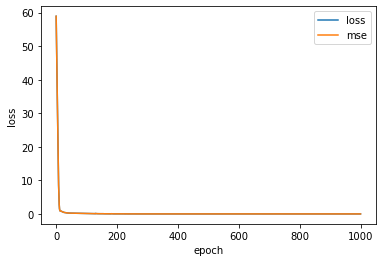

In [9]:
import matplotlib.pyplot as plt
# print(hist.history)
plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
# #plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse'], loc='upper right')
plt.show()

## 5. 평가 예측
* 예측값 데이터로 사용하기 위해 모양을 맞춰줘야 한다.(3차원!!)

In [10]:
loss, mse = model.evaluate(x, y )
print("loss : ", loss)
print("mse : ", mse)

6/6 [==============================] - 0s 33ms/sample - loss: 2.5986e-04 - mse: 2.5986e-04
loss :  0.00025985794491134584
mse :  0.00025985794


In [11]:
x_predict = np.array([7,8,9,10])
print(x_predict.shape) 
x_predict = x_predict.reshape(1, x_predict.shape[0], 1)
print(x_predict.shape)

(4,)
(1, 4, 1)


In [12]:
y_predict = model.predict(x_predict)
print("예측값 : ", y_predict)

예측값 :  [[10.80989]]
